<a href="https://colab.research.google.com/github/ghkdwnwsdud/AI-Project/blob/main/week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
from torch.utils.data import DataLoader
from google.colab import files
import io
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings(action='ignore')

In [2]:
# import the Titanic dataset as a training dataset
uploaded = files.upload()

Saving train.csv to train.csv


In [3]:
#We will use 'Survived' feature as a class(y) but there is no 'Survived' feature in test.csv.
#So Split the train data into train and validation data.

train = pd.read_csv(io.BytesIO(uploaded['train.csv']))
train, valid = train_test_split(train, test_size = 0.3, random_state = 55)

##Data Observation ##

In [4]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
636,637,0,3,"Leinonen, Mr. Antti Gustaf",male,32.0,0,0,STON/O 2. 3101292,7.9250,NaN,S
209,210,1,1,"Blank, Mr. Henry",male,40.0,0,0,112277,31.0000,A31,C
756,757,0,3,"Carlsson, Mr. August Sigfrid",male,28.0,0,0,350042,7.7958,NaN,S
291,292,1,1,"Bishop, Mrs. Dickinson H (Helen Walton)",female,19.0,1,0,11967,91.0792,B49,C
499,500,0,3,"Svensson, Mr. Olof",male,24.0,0,0,350035,7.7958,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 636 to 461
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  623 non-null    int64  
 1   Survived     623 non-null    int64  
 2   Pclass       623 non-null    int64  
 3   Name         623 non-null    object 
 4   Sex          623 non-null    object 
 5   Age          493 non-null    float64
 6   SibSp        623 non-null    int64  
 7   Parch        623 non-null    int64  
 8   Ticket       623 non-null    object 
 9   Fare         623 non-null    float64
 10  Cabin        144 non-null    object 
 11  Embarked     622 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 63.3+ KB


In [6]:
#There are no survived feature since this is the test data!
#test = pd.read_csv(io.BytesIO(uploaded['test.csv']))
#test.head(5)

##Data preprocessing##

##One-hot encoding

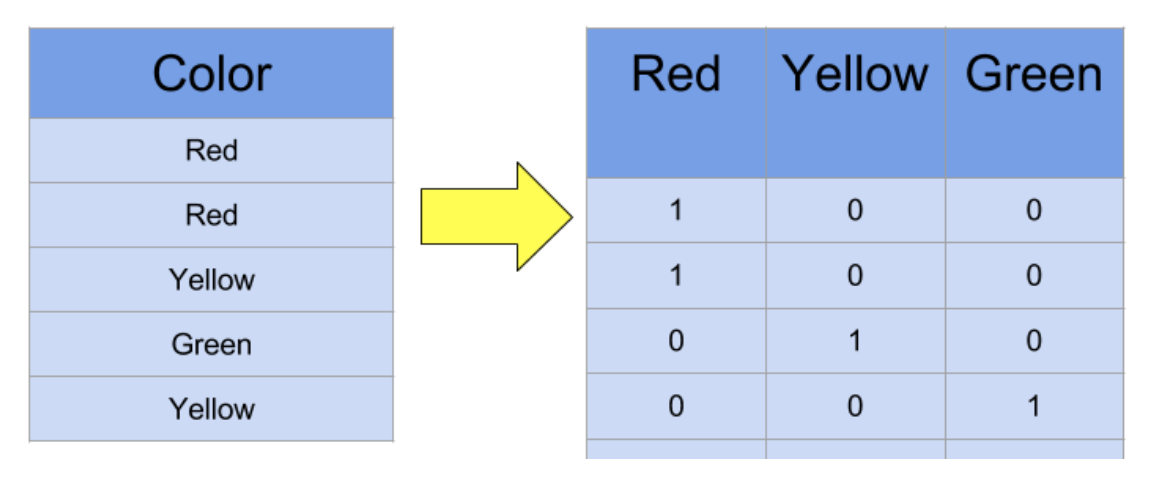

In [7]:
#one hot encoding
train = pd.get_dummies(train, columns = ['Sex'])
train

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
636,637,0,3,"Leinonen, Mr. Antti Gustaf",32.0,0,0,STON/O 2. 3101292,7.9250,NaN,S,0,1
209,210,1,1,"Blank, Mr. Henry",40.0,0,0,112277,31.0000,A31,C,0,1
756,757,0,3,"Carlsson, Mr. August Sigfrid",28.0,0,0,350042,7.7958,NaN,S,0,1
291,292,1,1,"Bishop, Mrs. Dickinson H (Helen Walton)",19.0,1,0,11967,91.0792,B49,C,1,0
499,500,0,3,"Svensson, Mr. Olof",24.0,0,0,350035,7.7958,NaN,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,824,1,3,"Moor, Mrs. (Beila)",27.0,0,1,392096,12.4750,E121,S,1,0
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",9.0,4,2,347082,31.2750,NaN,S,1,0
295,296,0,1,"Lewy, Mr. Ervin G",NaN,0,0,PC 17612,27.7208,NaN,C,0,1
666,667,0,2,"Butler, Mr. Reginald Fenton",25.0,0,0,234686,13.0000,NaN,S,0,1


# Problem 1 (1 point)#

Apply one-hot encoding to feature 'Embarked', as applied to feature 'Sex'.


In [8]:
#Write your answer here!
train = pd.get_dummies(train, columns = ['Embarked'])

In [9]:
train

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
636,637,0,3,"Leinonen, Mr. Antti Gustaf",32.0,0,0,STON/O 2. 3101292,7.9250,NaN,0,1,0,0,1
209,210,1,1,"Blank, Mr. Henry",40.0,0,0,112277,31.0000,A31,0,1,1,0,0
756,757,0,3,"Carlsson, Mr. August Sigfrid",28.0,0,0,350042,7.7958,NaN,0,1,0,0,1
291,292,1,1,"Bishop, Mrs. Dickinson H (Helen Walton)",19.0,1,0,11967,91.0792,B49,1,0,1,0,0
499,500,0,3,"Svensson, Mr. Olof",24.0,0,0,350035,7.7958,NaN,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,824,1,3,"Moor, Mrs. (Beila)",27.0,0,1,392096,12.4750,E121,1,0,0,0,1
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",9.0,4,2,347082,31.2750,NaN,1,0,0,0,1
295,296,0,1,"Lewy, Mr. Ervin G",NaN,0,0,PC 17612,27.7208,NaN,0,1,1,0,0
666,667,0,2,"Butler, Mr. Reginald Fenton",25.0,0,0,234686,13.0000,NaN,0,1,0,0,1


In [10]:
#min max scailing
train['Age'] = (train['Age'] - train['Age'].min()) / (train['Age'].max()  - train['Age'].min())
train['Fare'] = (train['Fare'] - train['Fare'].min()) / (train['Fare'].max()  - train['Fare'].min())
train['Pclass'] = (train['Pclass'] - train['Pclass'].min()) / (train['Pclass'].max()  - train['Pclass'].min())

In [11]:
train

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
636,637,0,1.0,"Leinonen, Mr. Antti Gustaf",0.427247,0,0,STON/O 2. 3101292,0.015469,NaN,0,1,0,0,1
209,210,1,0.0,"Blank, Mr. Henry",0.536343,0,0,112277,0.060508,A31,0,1,1,0,0
756,757,0,1.0,"Carlsson, Mr. August Sigfrid",0.372699,0,0,350042,0.015216,NaN,0,1,0,0,1
291,292,1,0.0,"Bishop, Mrs. Dickinson H (Helen Walton)",0.249966,1,0,11967,0.177775,B49,1,0,1,0,0
499,500,0,1.0,"Svensson, Mr. Olof",0.318151,0,0,350035,0.015216,NaN,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823,824,1,1.0,"Moor, Mrs. (Beila)",0.359062,0,1,392096,0.024350,E121,1,0,0,0,1
541,542,0,1.0,"Andersson, Miss. Ingeborg Constanzia",0.113596,4,2,347082,0.061045,NaN,1,0,0,0,1
295,296,0,0.0,"Lewy, Mr. Ervin G",NaN,0,0,PC 17612,0.054107,NaN,0,1,1,0,0
666,667,0,0.5,"Butler, Mr. Reginald Fenton",0.331788,0,0,234686,0.025374,NaN,0,1,0,0,1


In [12]:
uploaded = files.upload()

Saving train_preprocessed.csv to train_preprocessed.csv


In [13]:
train = pd.read_csv(io.BytesIO(uploaded['train_preprocessed.csv']))

train, valid = train_test_split(train, test_size = 0.3, random_state = 55)

In [14]:
x_train = train.drop(['Survived'], axis = 1)
y_train = train['Survived']

x_valid = valid.drop(['Survived'], axis=1)
y_valid = valid['Survived']

In [15]:
import torch
from torch.utils.data import DataLoader, TensorDataset


In [16]:
# x_train과 y_train을 numpy로 바꿔준 후 다시 그걸 torch로 바꾸는 과정
# Prepare your data for training with DataLoaders
x_train = torch.tensor(x_train.to_numpy(), dtype=torch.float32) # we can also use torch.from_numpy(x_train)
y_train = torch.tensor(y_train.to_numpy(), dtype=torch.float32)
y_train = y_train.reshape(-1,1) # -1 is used only once to indicate the remainder. ex) (24, 1) --> (-1, 4, 3) ==> -1 becomes 2
x_valid = torch.tensor(x_valid.to_numpy(), dtype=torch.float32)
y_valid = torch.tensor(y_valid.to_numpy(), dtype=torch.float32)
y_valid = y_valid.reshape(-1,1)

## MLP structure

![tigure](https://ifh.cc/g/VqFalT.jpg)

### Weight1 --> shape: 3*4
### Weight2 --> shape: 4*1

In [17]:
# Pytorch already implemented the simple feed forward network called "Linear"
#Input->Hidden
MLP1 = torch.nn.Linear(3,4)     #nn.Linear(input_dim, output_dim)
MLP1.weight, MLP1.bias

(Parameter containing:
 tensor([[-0.5689,  0.0799,  0.4611],
         [-0.1014,  0.1267,  0.4165],
         [-0.5019, -0.3018,  0.5534],
         [-0.0562,  0.3232,  0.3924]], requires_grad=True),
 Parameter containing:
 tensor([ 0.5449,  0.4495, -0.2034, -0.5529], requires_grad=True))

In [18]:
#Hidden->Output
MLP2 = torch.nn.Linear(4,1)
MLP2.weight, MLP2.bias

(Parameter containing:
 tensor([[ 0.4993,  0.2463, -0.0753, -0.2293]], requires_grad=True),
 Parameter containing:
 tensor([0.3599], requires_grad=True))

In [21]:
x = torch.tensor([1., 0., 1.])
target = torch.tensor(0.5)
## Pytorch has famous many used loss function and optimization
optim = torch.optim.SGD([MLP1.weight, MLP2.weight], lr=0.1)
loss_func = torch.nn.MSELoss()
y = MLP1(x)
y = torch.nn.functional.sigmoid(y)        #layer를 두 층을 쌓고 싶은데 기울기와 절편이 다른 한 층을 쌓은 것과 같아지는 현상을 막기 위해 비선형의 activation function을 적용하는 것(sigmoid), layer 두 층의 효과를 내기 위해서(activation function이 없으면 한층 쌓은 것과 똑같음)
y = MLP2(y)
y = torch.nn.functional.sigmoid(y)
print(f"y value before update : {y.item()}")

y value before update : 0.6669012308120728


In [22]:
for i in range(10000):
  y = MLP1(x)
  y = torch.nn.functional.sigmoid(y)
  y = MLP2(y)
  y = torch.nn.functional.sigmoid(y)
  loss = loss_func(y, target)
  # pytorch automaticaaly calculates the gradient and applies EBP(Error Back Propagation)
  optim.zero_grad()     #zero_grad() function is making the gradient zero..this time is for initialization
  loss.backward()          #pytorch automatically calculates the gradient
  optim.step()          #update the weights

MLP1.weight, MLP2.weight, y
#Weight of MLP1 layer and MLP2 layer has changed
#y value after update has changed to the target value

(Parameter containing:
 tensor([[-0.6130,  0.0799,  0.4170],
         [-0.1089,  0.1267,  0.4090],
         [-0.4748, -0.3018,  0.5804],
         [-0.0089,  0.3232,  0.4397]], requires_grad=True),
 Parameter containing:
 tensor([[ 0.1763, -0.1222, -0.3288, -0.4769]], requires_grad=True),
 tensor([0.5000], grad_fn=<SigmoidBackward0>))

### Customizing our Own layer
##### Pytorch provides class to customize our own layer

In [23]:
class My_layers(torch.nn.Module): # we inherited the torch module class
# we have to define __init__ function and forward function
  def __init__(self):
    super(My_layers, self).__init__()
    # Initialize the layers
    self.MLP1 = torch.nn.Linear(3, 4)
    self.MLP2 = torch.nn.Linear(4, 1)

  def forward(self, x): # x will be the input data        #layer를 통과하는 순서대로 정의해줌
    y = self.MLP1(x)
    y = torch.nn.functional.sigmoid(y)
    y = self.MLP2(y)
    y = torch.nn.functional.sigmoid(y)
    return y

In [24]:
model = My_layers()
x = torch.tensor([1., 0., 1.])
target = torch.tensor(0.5)
## Pytorch implemented famous many used loss function and optimization
optim = torch.optim.SGD(model.parameters(), lr=0.1) # .parameters() contain all the learnable parameters on model defined on __init__ function
loss_func = torch.nn.MSELoss()


In [25]:
for i in range(10000):
  y = model(x)
  loss = loss_func(target, y)
  optim.zero_grad()
  loss.backward()
  optim.step()
y

tensor([0.5000], grad_fn=<SigmoidBackward0>)

#### Problem 2 (1 point)
##### Make your own layer class to solve the XOR problem
##### Define the structure as shown in the below figure
##### 2-dim input (figure contains bias as 1), 2-dim hidden, 1-dim output,

![Figure](https://ifh.cc/g/wRGmtg.jpg)

In [26]:
class XOR_layer(torch.nn.Module):
  def __init__(self):
    super(XOR_layer, self).__init__()
    ## define your own layers!
    self.MLP1 = torch.nn.Linear(2, 2)
    self.MLP2 = torch.nn.Linear(2, 1)

  def forward(self, x):
    # define the forward function
    y = self.MLP1(x)
    y = torch.nn.functional.sigmoid(y)
    y = self.MLP2(y)
    y = torch.nn.functional.sigmoid(y)

    return y

In [27]:
model = XOR_layer()
loss_func = torch.nn.MSELoss()
optim = torch.optim.SGD(model.parameters(), lr=0.1)
### define x and target data
### for example, if x = [0, 0] --> target =[0]
### x = [1, 0] --> target = [1]
### make 4 input as one input data
### for example, x = [[0,0], [1,0]] is 2 input data
x = torch.tensor([[0.,0.], [1.,0.], [0.,1.], [1.,1.]])
target = torch.tensor([[0.], [1.], [1.], [0.]])


In [29]:
for i in range(30000): # choose your own number of epochs
  y = model(x)
  loss = loss_func(target, y)
  optim.zero_grad()
  loss.backward()
  optim.step()
y

tensor([[0.0244],
        [0.9723],
        [0.9771],
        [0.0216]], grad_fn=<SigmoidBackward0>)

### What we just did is something strange. We gave answers to the models and checked by questioning the same question.
### What our model wants to do is to adapt to newly asked questions!
#### We should make train dataset, validation dataset and test dataset!
#### We use train dataset only for training and tune our hyperparameter with validation dataset.
####Finally, we evaluate our model with test dataset
####we can't evaluate with our model with titanic dataset --> Today, we will evaluate with validation dataset

In [30]:
# from sklearn.model_selection import train_test_split # We used train_test split function implemented by scikit-learn library
# X_train, X_test, Y_train, Y_test = train_test_split(
#      x_train, y_train, test_size=0.2, random_state=42) # We divide the data into 8:2

train = TensorDataset(x_train, y_train)
train_dataloader = DataLoader(train, batch_size = 64, shuffle=True)   #data를 64개씩 가져오도록 함
valid = TensorDataset(x_valid, y_valid)
valid_dataloader = DataLoader(valid, batch_size = 64, shuffle=False)


In [31]:
for i, data in enumerate(train_dataloader): # we can use the batch data like this!
  x, y = data
  print(i, x.shape, y.shape)


0 torch.Size([64, 10]) torch.Size([64, 1])
1 torch.Size([64, 10]) torch.Size([64, 1])
2 torch.Size([64, 10]) torch.Size([64, 1])
3 torch.Size([64, 10]) torch.Size([64, 1])
4 torch.Size([64, 10]) torch.Size([64, 1])
5 torch.Size([64, 10]) torch.Size([64, 1])
6 torch.Size([64, 10]) torch.Size([64, 1])
7 torch.Size([64, 10]) torch.Size([64, 1])
8 torch.Size([64, 10]) torch.Size([64, 1])
9 torch.Size([47, 10]) torch.Size([47, 1])


### Finally, let's apply Feed Forward Network on our titanic data

##### For the classification dataset, we can't use MSE as our loss function.
##### Therefore, we use the Cross Entropy Loss function
![CEL](https://pbs.twimg.com/media/FBmVmdHWQAAU7gq.png)

$Y_i$ is the target value and $\hat{Y_i}$ is the predicted value of the model

In [32]:
x_train.shape # as we can see, there are 10 input features(dimensions)

torch.Size([623, 10])

In [33]:
loss_func = torch.nn.BCELoss() # Pytorch already implemented Cross Entropy Loss for us


#### Problem 3 (1 point)
##### Make your own class again to apply the titanic data
##### Please define more than 1 hidden layers

In [34]:
class Titanic_layer(torch.nn.Module):
  def __init__(self):
    super(Titanic_layer, self).__init__()
    ## define your own layers!
    self.MLP1 = torch.nn.Linear(10, 32)
    self.MLP2 = torch.nn.Linear(32, 64)
    self.MLP3 = torch.nn.Linear(64, 32)
    self.MLP4 = torch.nn.Linear(32, 16)
    self.MLP5 = torch.nn.Linear(16, 4)
    self.MLP6 = torch.nn.Linear(4, 1)

  def forward(self, x):
    # define the forward function
    y = self.MLP1(x)
    y = torch.nn.functional.relu(y)
    y = self.MLP2(y)
    y = torch.nn.functional.relu(y)
    y = self.MLP3(y)
    y = torch.nn.functional.relu(y)
    y = self.MLP4(y)
    y = torch.nn.functional.relu(y)
    y = self.MLP5(y)
    y = torch.nn.functional.relu(y)
    y = self.MLP6(y)
    y = torch.nn.functional.sigmoid(y)

    return y

In [35]:
# If you defined our model, you can just run this cell and next cell to check the accuracy of your model
epoches =  1000      # please write your own epoch
model = Titanic_layer()
optim = torch.optim.SGD(model.parameters(), lr = 0.05)
batch_len = len(train_dataloader)

In [36]:
for epoch in range(1, epoches+1):
  mean_loss = 0
  for i, data in enumerate(train_dataloader):
    x, target = data
    x = torch.tensor(x, dtype=torch.float32)
    y = model(x)
    target = torch.tensor(target, dtype=torch.float32)
    loss = loss_func(y, target)
    mean_loss += loss
    optim.zero_grad()
    loss.backward()
    optim.step()
  mean_loss /= batch_len
  print(f'Epoch: {epoch}, Train Loss: {mean_loss}')

Epoch: 1, Train Loss: 0.7279499769210815
Epoch: 2, Train Loss: 0.7083966732025146
Epoch: 3, Train Loss: 0.6957632303237915
Epoch: 4, Train Loss: 0.6863039135932922
Epoch: 5, Train Loss: 0.6788825392723083
Epoch: 6, Train Loss: 0.6746166348457336
Epoch: 7, Train Loss: 0.6706966161727905
Epoch: 8, Train Loss: 0.6684145331382751
Epoch: 9, Train Loss: 0.6666576862335205
Epoch: 10, Train Loss: 0.6636672616004944
Epoch: 11, Train Loss: 0.6631940603256226
Epoch: 12, Train Loss: 0.6617700457572937
Epoch: 13, Train Loss: 0.6609448194503784
Epoch: 14, Train Loss: 0.6602445244789124
Epoch: 15, Train Loss: 0.6602816581726074
Epoch: 16, Train Loss: 0.6589246988296509
Epoch: 17, Train Loss: 0.6595072746276855
Epoch: 18, Train Loss: 0.6594310998916626
Epoch: 19, Train Loss: 0.6584526896476746
Epoch: 20, Train Loss: 0.6609565019607544
Epoch: 21, Train Loss: 0.6591192483901978
Epoch: 22, Train Loss: 0.6581148505210876
Epoch: 23, Train Loss: 0.6563010811805725
Epoch: 24, Train Loss: 0.6574799418449402
E

In [38]:
# sample code to check the accuracy of our test dataset
acc=0
total=0
for i, data in enumerate(valid_dataloader):
    x, target = data
    x = x.type(torch.FloatTensor)
    y = model(x)
    target = target.reshape(-1, 1)
    target = target.type(torch.FloatTensor)
    real_y = (y>=0.5).float()
    acc += (real_y == target).float().sum()
    total += target.shape[0]
print(f'Mean Accuracy of validation: {(acc/total).item()}')

Mean Accuracy of validation: 0.7761194109916687


## 2. Dropout
#### We randomly make some weights to 0 so this weights aren't used in training and also updating
#### We can use dropout like this
```python
dropout = torch.nn.Dropout(p=0.5)
dropout(input)
```


#### Problem 4: use nn.Dropout on our previous titanic_layer and find out the difference of our plot! Also, explain why the dropout alleviates the overfitting problem (1 points)

In [42]:
# why does the dropout alleviates the overfitting problem?


class Titanic_layer(torch.nn.Module):
  def __init__(self):
    super(Titanic_layer, self).__init__()
    ## define your own layers!
    self.MLP1 = torch.nn.Linear(10, 32)
    self.MLP2 = torch.nn.Linear(32, 64)
    self.MLP3 = torch.nn.Linear(64, 32)
    self.MLP4 = torch.nn.Linear(32, 16)
    self.MLP5 = torch.nn.Linear(16, 4)
    self.MLP6 = torch.nn.Linear(4, 1)
    # write down the dropout as you want
    self.drop1 = torch.nn.Dropout()
    self.drop2 = torch.nn.Dropout()

  def forward(self, x):
    # define the forward function
    # use the dropout function after the activation function
    y = self.MLP1(x)
    y = torch.nn.functional.relu(y) # we will use relu as our activation function. relu has advantage when layers go deeper!
    y = self.MLP2(y)
    y = torch.nn.functional.relu(y)
    y = self.MLP3(y)
    y = torch.nn.functional.relu(y)
    y = self.drop1(y)
    y = self.MLP4(y)
    y = torch.nn.functional.relu(y)
    y = self.MLP5(y)
    y = torch.nn.functional.relu(y)
    y = self.drop2(y)
    y = self.MLP6(y)
    y = torch.nn.functional.sigmoid(y) #last element should be with 0~1, therefore, we can't use relu
    return y

In [45]:
epoches =  200      # please write your own number of epoch
model = Titanic_layer()
loss_func = torch.nn.BCELoss()
optim = torch.optim.Adam(model.parameters(), lr = 0.001)
train_total_acc = []
test_total_acc = []
for epoch in range(1, epoches+1):
  train_acc = 0
  train_total = 0
  test_acc = 0
  test_total = 0
  for i, data in enumerate(train_dataloader):
    x, target = data
    model.train() # this code indicates that model is in training mode
    y = model(x)
    loss = loss_func(y, target)
    real_y = (y>=0.5).float()
    train_acc += (real_y == target).float().sum()
    train_total += target.shape[0]
    optim.zero_grad()
    loss.backward()
    optim.step()
  for i, data in enumerate(valid_dataloader):
    x, target = data
    model.eval() # this code indicates that model is in evaluation mode
    with torch.no_grad():
      y = model(x)
      loss = loss_func(y, target)
      real_y = (y>=0.5).float()
      test_acc += (real_y == target).float().sum()
      test_total += target.shape[0]
  train_total_acc.append(train_acc/train_total)
  test_total_acc.append(test_acc/test_total)

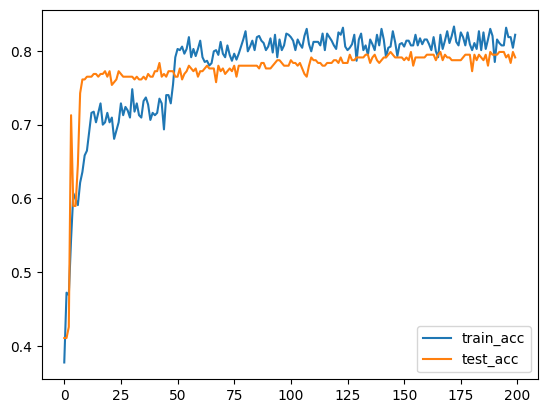

In [46]:
import matplotlib.pyplot as plt

plt.plot(np.arange(len(train_total_acc)), train_total_acc, label='train_acc')
plt.plot(np.arange(len(test_total_acc)), test_total_acc, label='test_acc')
plt.legend()
plt.show()

## Hyper-parameter tuning: Split data into Train, Validation, Test dataset
- To update the performace of models, we can tune our model of hyper-parameters.
- The validation dataset is used for hyper-parameters tuning, not test datset. (Note: A test dataset is only used for a final evalutation)
- We can split the train dataset into train and validation dataset.


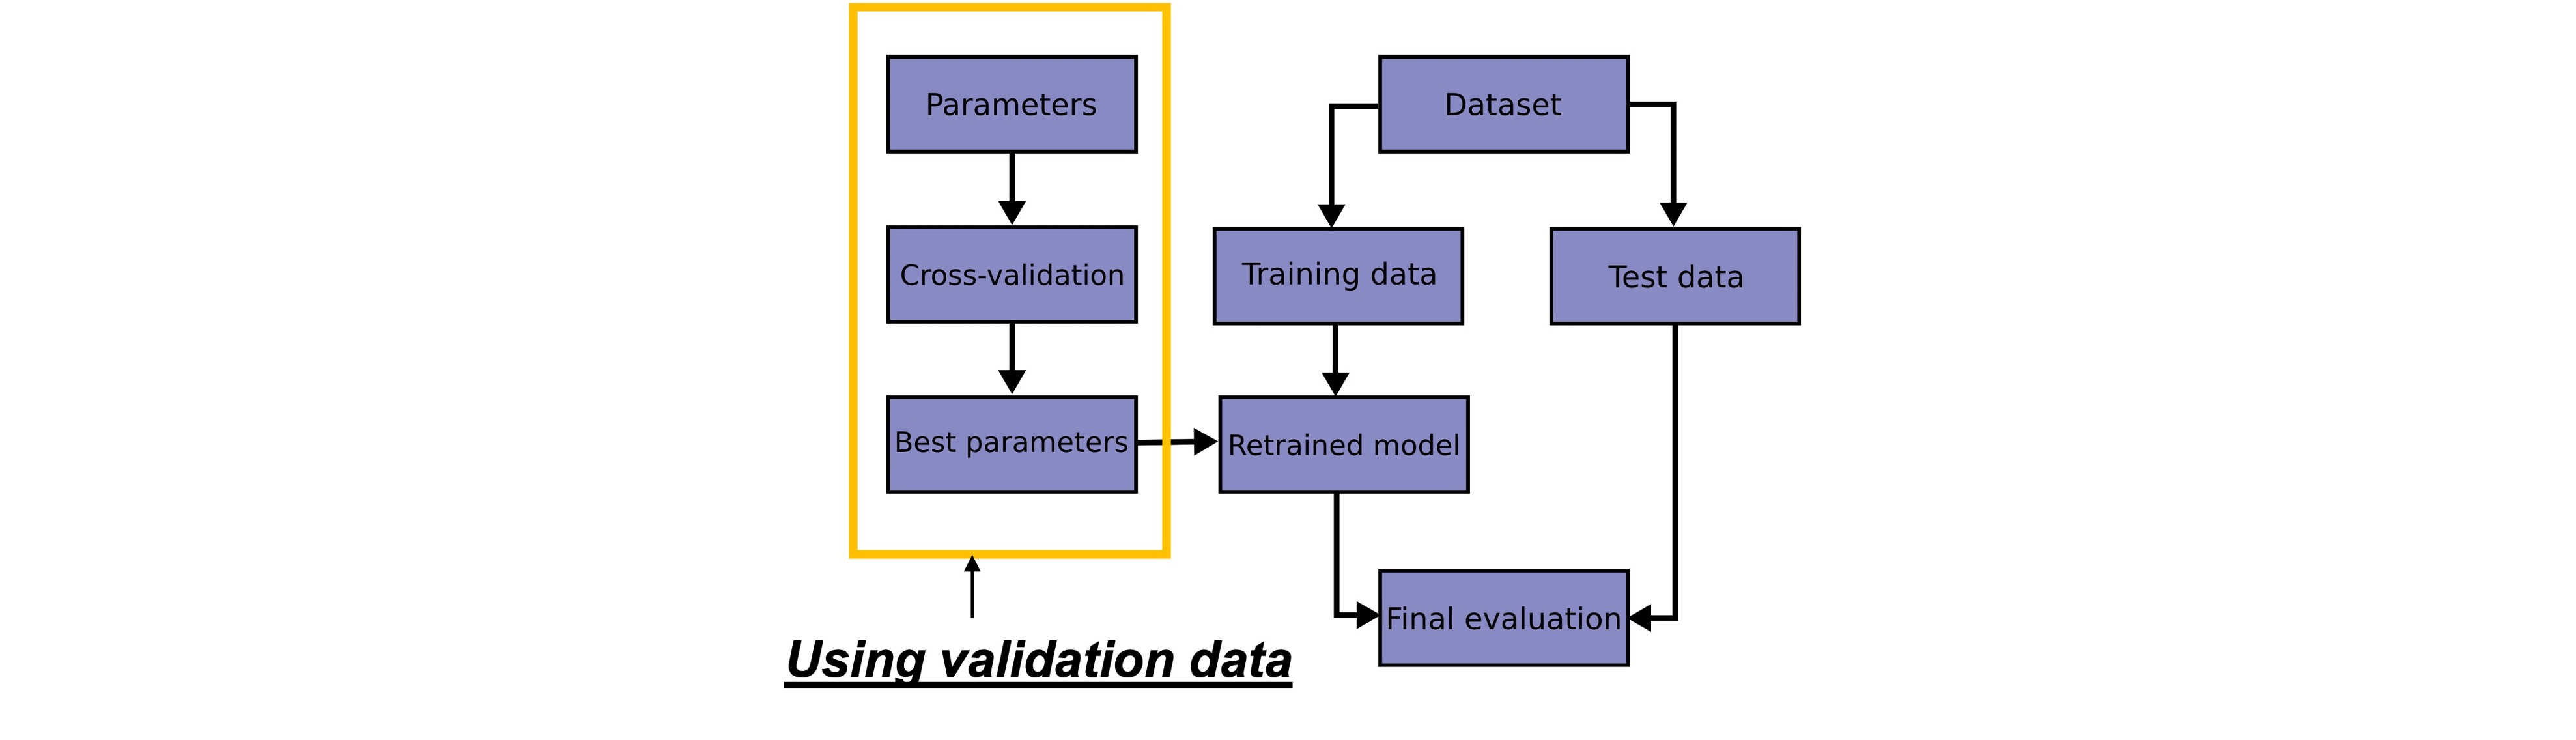

## Hyper-parameters tuning: cross-validated grid-search
When we split data into three sets, there is a risk of sampling bias(over-estimation or under-estimation), but also a limit to utilize the only part of dataset. A cross-validation (CV for short) is used as the solution for this problem. [Reference](https://scikit-learn.org/stable/modules/cross_validation.html)

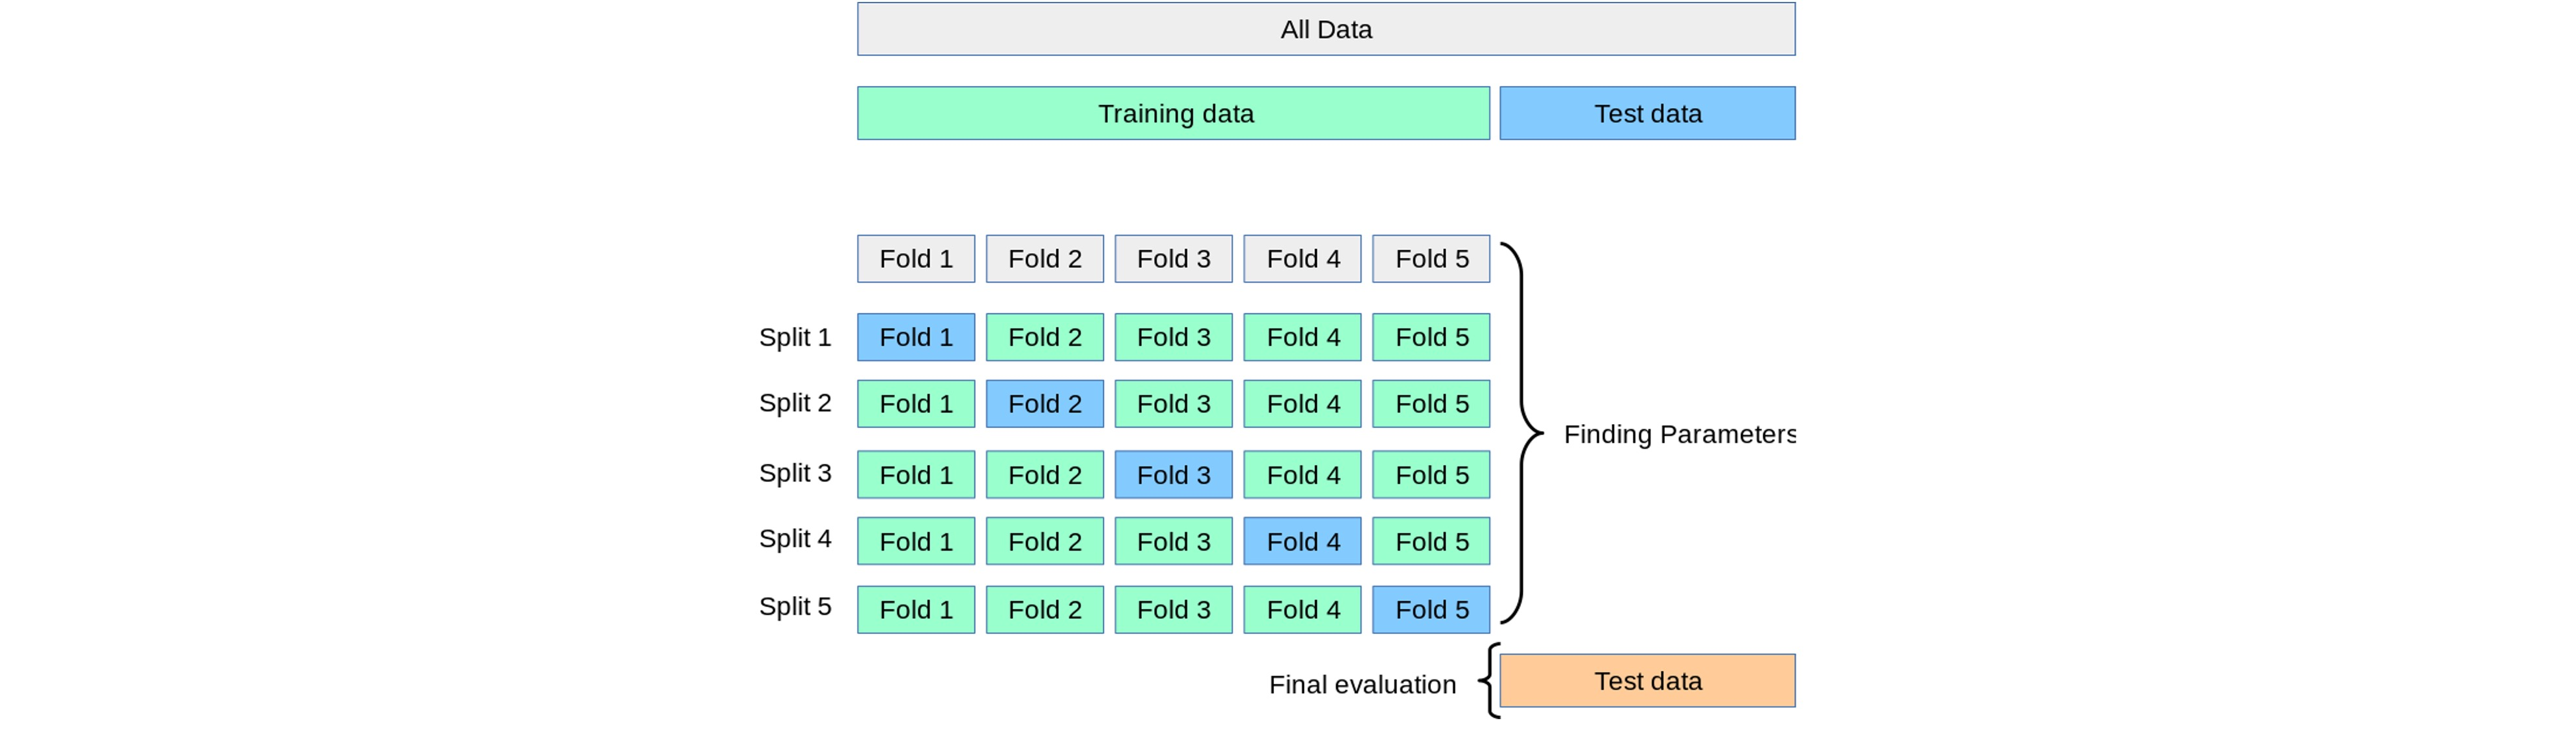

In [47]:
from sklearn.model_selection import KFold
dataset = np.array(train)
kf = KFold(n_splits=3, shuffle=True, random_state=42)
n_split = 0
for train_idx, val_idx in kf.split(dataset):
  print(f'{n_split+1} fold {train_idx[:10]}, {val_idx[:10]}')
  n_split += 1
  # display(train.loc[dataset[val_idx]].head(3))

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (623, 2) + inhomogeneous part.

To tune multiple hyper-parameters, we can use [***cross-validated grid-search*** ](https://en.wikipedia.org/wiki/Hyperparameter_optimization#Grid_search)method.
1. Select the hyper-parameters which you want to tune.
2. Set the candidate values for each hyper-parameters.
3. Apply into model using grid search method
3. Return the best set of hyper-parameters for the model.


In [48]:
# The goal of skorch is to make it possible to use PyTorch with sklearn.
# This is achieved by providing a wrapper around PyTorch that has an sklearn interface.
# https://skorch.readthedocs.io/en/stable/index.html
!pip install skorch       #sklearn에 torch를 합해서 torch value를 사용 가능

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.3/239.3 kB 2.1 MB/s eta 0:00:00


In [49]:
train = pd.read_csv('./train_preprocessed.csv')

In [50]:
X = np.array(train.drop(['Survived'], axis=1)).astype(np.float32)
y = np.array(train['Survived']).astype(np.float32).reshape(-1, 1)

In [51]:
def my_accuracy(net, X, y):
  real_y = (net.predict_proba(X)>=0.5)
  val_acc = (np.where(real_y)[1].reshape(-1, 1) == y).sum()
  val_total = y.shape[0]
  return (val_acc/val_total)

In [52]:
from skorch import NeuralNet

net = NeuralNet(Titanic_layer,
                max_epochs = 20,
                lr=0.01,
                criterion=torch.nn.BCELoss,
                optimizer=torch.optim.Adam,
                verbose=0,
                device='cpu')
net.fit(X, y)
print(f'Accuracy of training dataset: {my_accuracy(net, X, y): .2f}%')

Accuracy of training dataset:  0.83%


In [53]:
# 1. Select the hyper-parameters which you want to tune
print(net.get_params().keys())

dict_keys(['module', 'criterion', 'optimizer', 'lr', 'max_epochs', 'batch_size', 'iterator_train', 'iterator_valid', 'dataset', 'train_split', 'callbacks', 'predict_nonlinearity', 'warm_start', 'verbose', 'device', 'compile', 'use_caching', '_params_to_validate', 'callbacks__epoch_timer', 'callbacks__train_loss', 'callbacks__train_loss__name', 'callbacks__train_loss__lower_is_better', 'callbacks__train_loss__on_train', 'callbacks__valid_loss', 'callbacks__valid_loss__name', 'callbacks__valid_loss__lower_is_better', 'callbacks__valid_loss__on_train', 'callbacks__print_log', 'callbacks__print_log__keys_ignored', 'callbacks__print_log__sink', 'callbacks__print_log__tablefmt', 'callbacks__print_log__floatfmt', 'callbacks__print_log__stralign'])


In [54]:
# 2. Set the candidate values for each hyper-parameters.
params = {'optimizer':[torch.optim.Adam,torch.optim.RMSprop],
          'lr':[0.001, 0.005, 0.01]}

In [55]:
# 3. Apply into model using cross validated grid search method
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(estimator=net,
                  param_grid=params,
                  scoring=my_accuracy,
                  cv=3,
                  verbose=0)

gs.fit(X, y)
# 4. Return the best set of hyper-parameters for the model.
print(f'Accuracy: {gs.best_score_ * 100 :.2f}%')
print(gs.best_params_)

Accuracy: 74.64%
{'lr': 0.001, 'optimizer': <class 'torch.optim.rmsprop.RMSprop'>}


In [56]:
gs.cv_results_['params']

[{'lr': 0.001, 'optimizer': torch.optim.adam.Adam},
 {'lr': 0.001, 'optimizer': torch.optim.rmsprop.RMSprop},
 {'lr': 0.005, 'optimizer': torch.optim.adam.Adam},
 {'lr': 0.005, 'optimizer': torch.optim.rmsprop.RMSprop},
 {'lr': 0.01, 'optimizer': torch.optim.adam.Adam},
 {'lr': 0.01, 'optimizer': torch.optim.rmsprop.RMSprop}]

In [57]:
gs.cv_results_["mean_test_score"]

array([0.5701459 , 0.74635241, 0.72390572, 0.70145903, 0.67564534,
       0.70145903])

### Problem 4: Using cross-validated grid search method, decide the proper size of epochs to avoid overfitting. (1 points)
In machine learning, early stopping is a form of regularization used to avoid overfitting when training a learner with an iterative method, such as gradient descent. Such methods update the learner so as to make it better fit the training data with each iteration.
([Reference](https://en.wikipedia.org/wiki/Early_stopping))

In [58]:
# You can refer the above plot of accuray to decide the range of epochs   #grid search를 통해 가장 높은 accuracy를 갖는 max_epochs와 lr hyperparameter 조합을 찾음
params = {'max_epochs': [10, 20, 30, 40, 50],
          'lr':[0.001, 0.005, 0.01]}

gs = GridSearchCV(estimator=net,
                  param_grid=params,
                  scoring=my_accuracy,
                  cv=3,
                  verbose=0)

gs.fit(X, y)

print(f'Accuracy: {gs.best_score_ * 100 :.2f}%')
print(gs.best_params_)

Accuracy: 79.91%
{'lr': 0.005, 'max_epochs': 50}


#### For more information about pytorch, you can visit pytorch Website
[pytorch](https://pytorch.org/)
#### Or pytorch github page
[github](https://github.com/pytorch/pytorch)
##### For example, There are lots of activation function you can use (relu, tanh or else) and many different optimization function(adam, ...)
##### Please look at those more information and think about why there are different activation functions ( hint: It is related with the backpropagation)
